# Exploring the Ames Housing dataset
This example is from chapter 9 (with some modifications)

## Loading the Ames Housing dataset into a data frame

The dataset contains information about individual residential property in Ames, Iowa, from 2006 to 2010. The dataset was collected by Dean De Cock in 2011, and additional information is available via the following links:
- Dataset source: http://jse.amstat.org/v19n3/decock/AmesHousing.txt
- Dataset documentation: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
- Dataset write-up: http://jse.amstat.org/v19n3/decock.pdf

The Ames Housing dataset consists of 2,930 examples and 80 features. For simplicity, we will only work with a subset of the features, shown in the following list.

- `'Overall Qual'`: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
- `'Overall Cond'`: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
- `'Gr Liv Area'`: Above grade (ground) living area square feet
- `'Central Air'`: Central air conditioning

       N	No
       Y	Yes

- `'Total Bsmt SF'`: Total square feet of basement area
- `'SalePrice'`: Sale price $$

Import the data into a Pandas dataframe (df)

In [20]:
import pandas as pd

columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)

df.head(n=5)

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [2]:
df.shape

(2930, 6)

We convert the 'Y'/'N' strings to the numbers 0 and 1 using the `.map()` function

In [3]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [4]:
# Check if there are any missing values?
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [5]:
# We have plenty of data, so we simply remove the row which contains the missing value

df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

To simplify the training procedure we use scikit-learn's own LinearRegression object

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

slr = LinearRegression()
slr.fit(X,y)

LinearRegression()

In [7]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

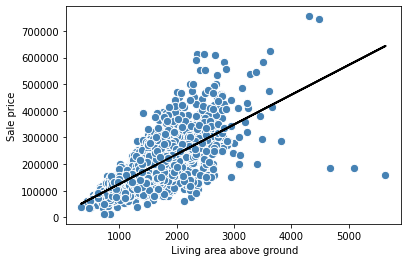

In [8]:
lin_regplot(X, y, slr)
plt.xlabel(' Living area above ground')
plt.ylabel('Sale price')
plt.show()

## Train a model on all five features

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

target = 'SalePrice'
print(df.columns != target)
features = df.columns[df.columns != target]

# Exatract the data
X = df[features].values
y = df[target].values

print('X.shape: ', X.shape)
print('y.shape: ', y.shape)

[ True  True  True  True  True False]
X.shape:  (2929, 5)
y.shape:  (2929,)


In [17]:

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Create Linear regression instance
slr = LinearRegression()

# Train the model
slr.fit(X_train, y_train)

# Use the trained model to predict housing prices
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)




In higher dimensions it is challenging to visualize the linear function. In these cases we plot the signed error (residuals).

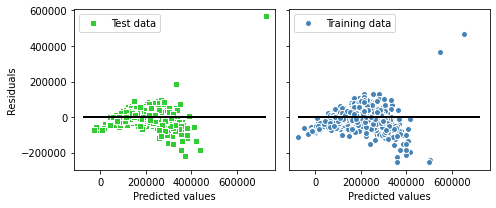

In [11]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(
    y_test_pred, 
    y_test_pred - y_test,
    c='limegreen',
    marker='s',
    edgecolor='white',
    label='Test data')
ax2.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='steelblue',
    marker='o',
    edgecolor='white',
    label='Training data')

ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()
plt.show()

#### Check the loss of the model
In the code below we compute the mean squared error (MSE). That is,
$$
MSE = \frac{1}{K} \sum_{i=1}^{K} (y^{(i)} - \hat{y}^{(i)})^2
$$To simplify the training procedure we use scikit-learn's own LinearRegression object

In [12]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

MSE train: 1497216245.85
MSE test: 1516565821.00


The mean squared error can be hard to relate to concrete housing prices. Instead we may, for example, use mean absolute error:
    $$
    MAE = \frac{1}{K}\sum_{i=1}^{K}|y^{(i)} - \hat{y}^{(i)}|
    $$

In [19]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')
print(f"Mean house price: {round(np.mean(y_train))}")

MAE train: 25983.03
MAE test: 24921.29
Mean house price: 181131
